In [14]:
import matplotlib.pyplot as plt
import matplotlib
import scipy
import numpy as np

In [15]:
matplotlib.rcParams.update({'font.size': 22})

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [106]:
def read(spe_filename):
    """given a .Spe file, return the data as a numpy array"""
    N_CHANNELS = 8191
    START_LINE = 13
    
    with open(spe_filename, "r", encoding="utf-8") as spe_file:
        spe_lines = spe_file.readlines()
    data_lines = spe_lines[START_LINE:START_LINE+N_CHANNELS]
    data_nums = [int(d.strip().replace("\n", "")) for d in data_lines]
    return np.array(data_nums)

def read_time(spe_filename):
    with open(spe_filename, "r", encoding="utf-8") as spe_file:
        time_line = spe_file.readlines()[9]  # example: 245 245
        time_line = time_line.strip().replace("\n", "")
        live, real = map(int, time_line.split())
    return live, real

def live_time(spe_filename):
    return read_time(spe_filename)[0]    

In [107]:
spectrum_co60 = read('final_runs/frun3_co60_live180s.Spe')
spectrum_ba133 = read('final_runs/frun1_ba133_live180s.Spe')
spectrum_na22 = read('final_runs/frun2_na22_live180s.Spe')

spectrum_x = read('run7_mystery_source.Spe')

#old
spectrum_bkg = read('run3_background.Spe')

live_time_co60 = live_time('final_runs/frun3_co60_live180s.Spe')
live_time_ba133 = live_time('final_runs/frun1_ba133_live180s.Spe')
live_time_na22 = live_time('final_runs/frun2_na22_live180s.Spe')
live_time_x = live_time('run7_mystery_source.Spe')
live_time_bkg = live_time('run3_background.Spe')




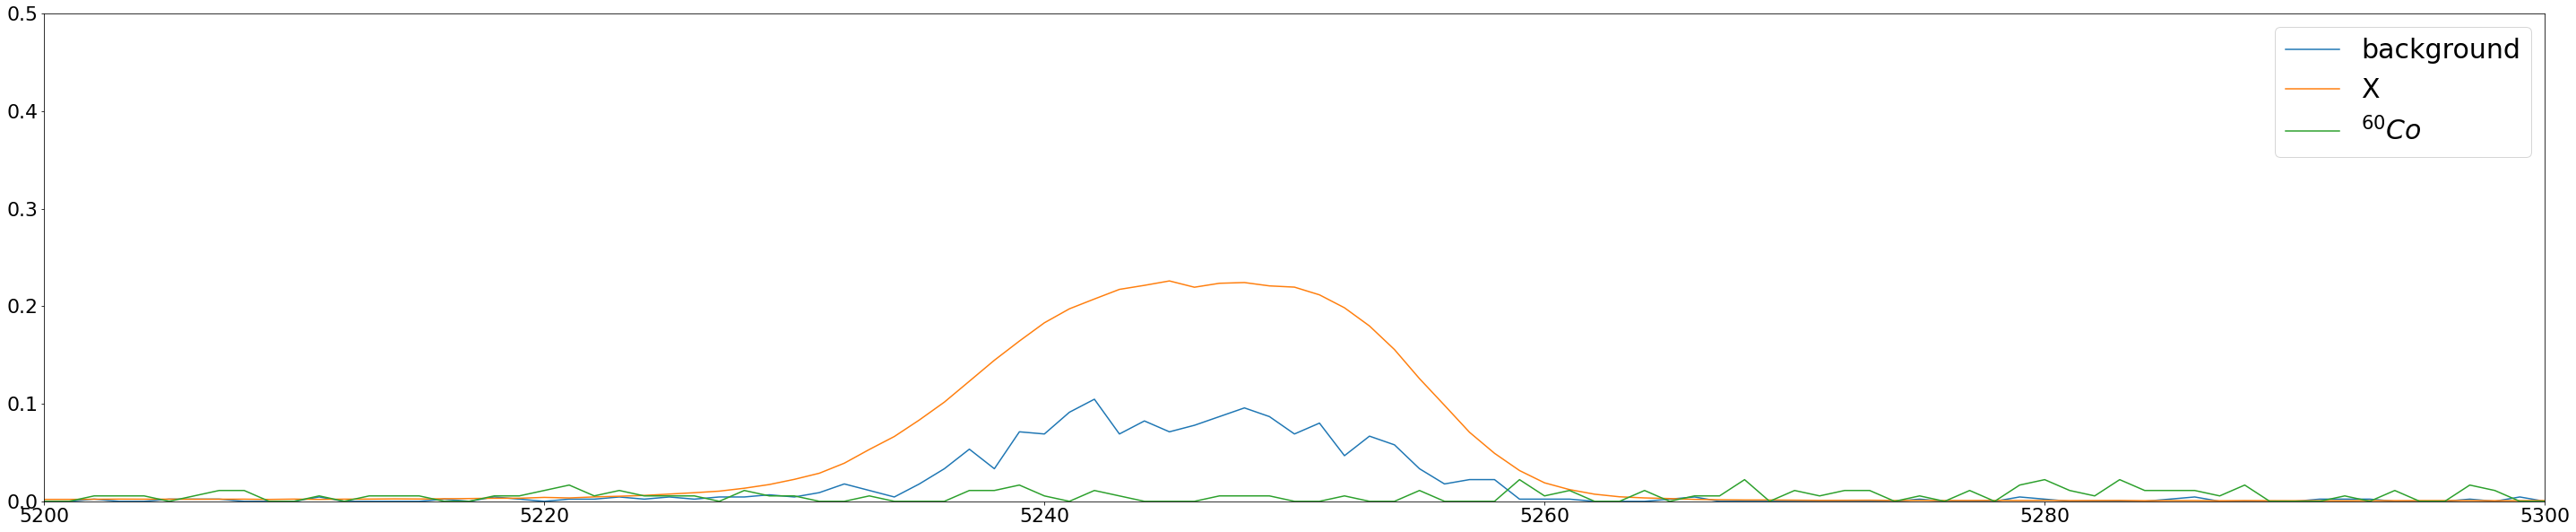

In [115]:
plt.figure(figsize=(50, 10))

plt.plot(spectrum_bkg/live_time_bkg, label=r'background')
plt.plot(spectrum_x/live_time_x, label=r'X')
plt.plot(spectrum_co60/live_time_co60, label=r'$^{60}Co$')
#plt.plot(spectrum_ba133/live_time_ba133, label=r'$^{133}Ba$')
#plt.plot(spectrum_na22/live_time_na22, label=r'$^{22}Na$')
plt.ylim(0,0.5)
plt.xlim(5200,5300)
plt.legend(fontsize=30)
plt.show()

(0.0, 1000.0)

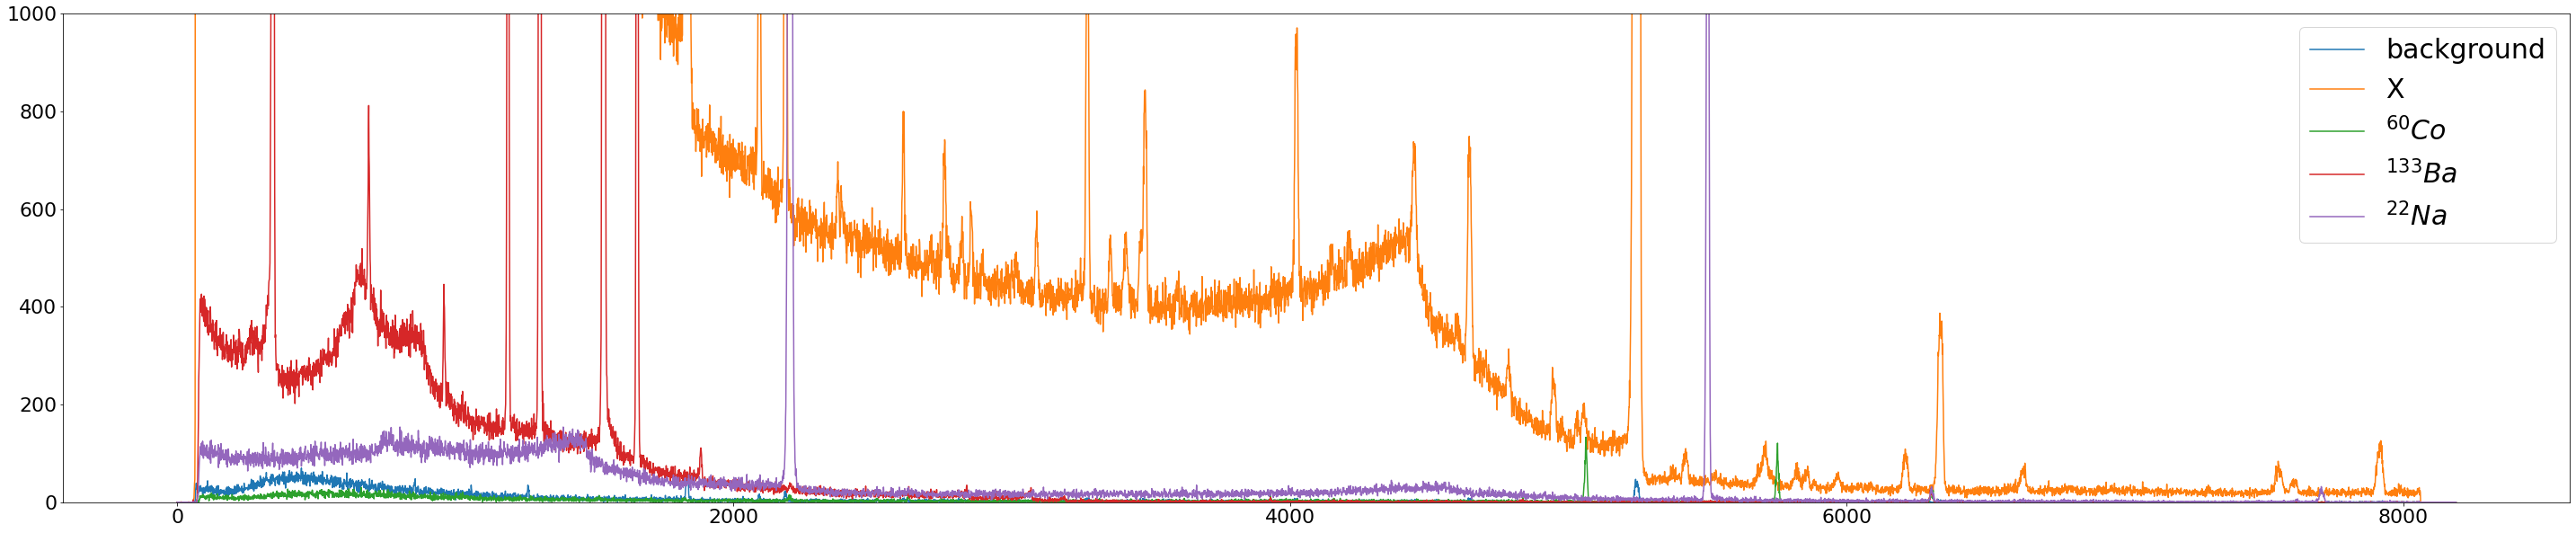

In [116]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.legend(fontsize=30)
plt.ylim(0, 1000)

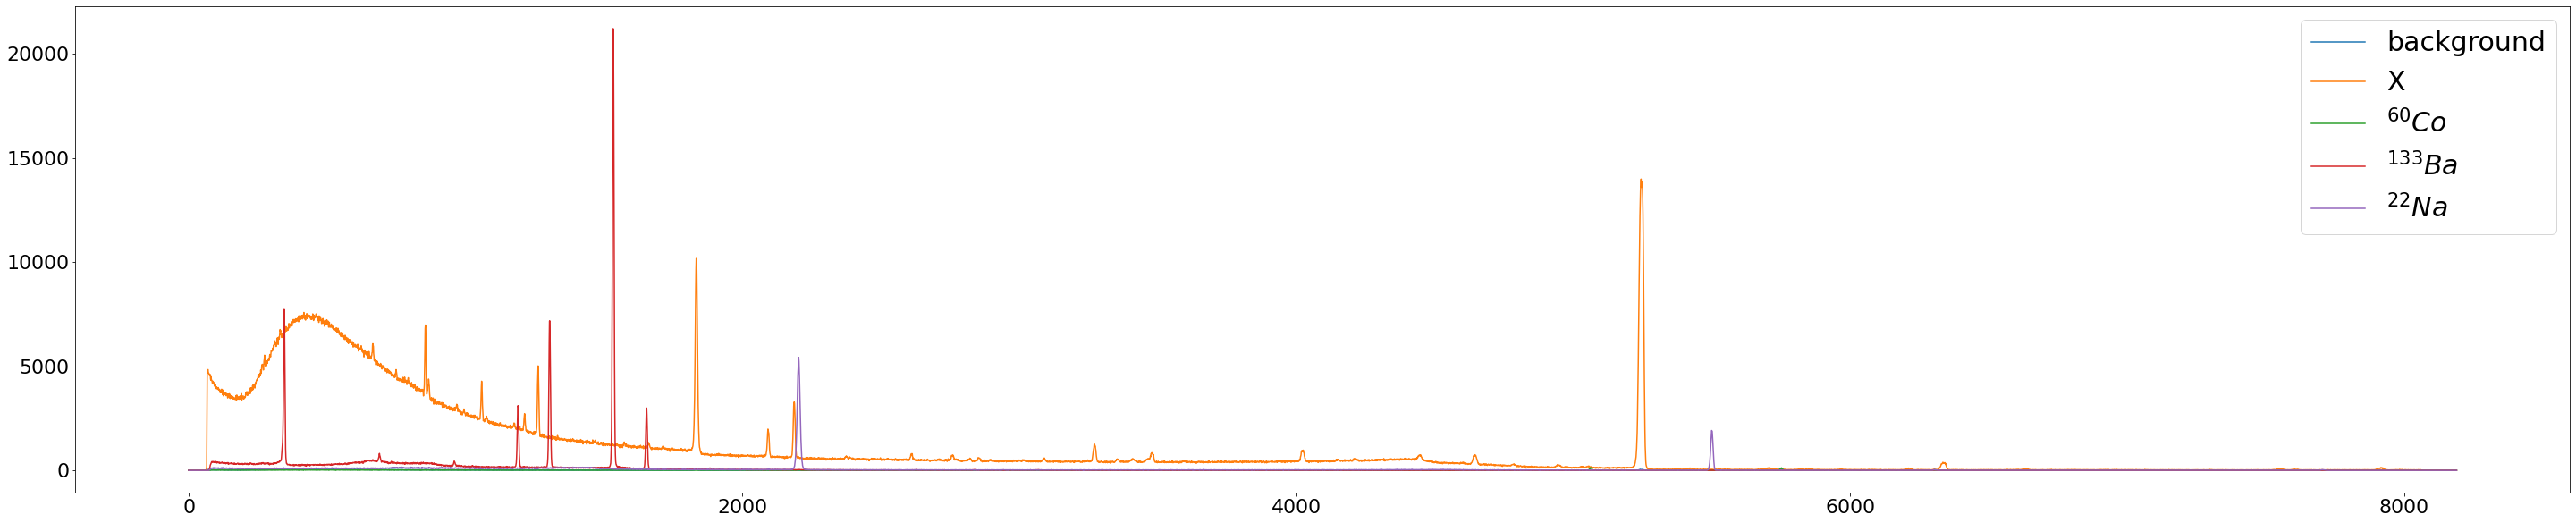

In [21]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.legend(fontsize=30)
# plt.ylim(0, 1000)


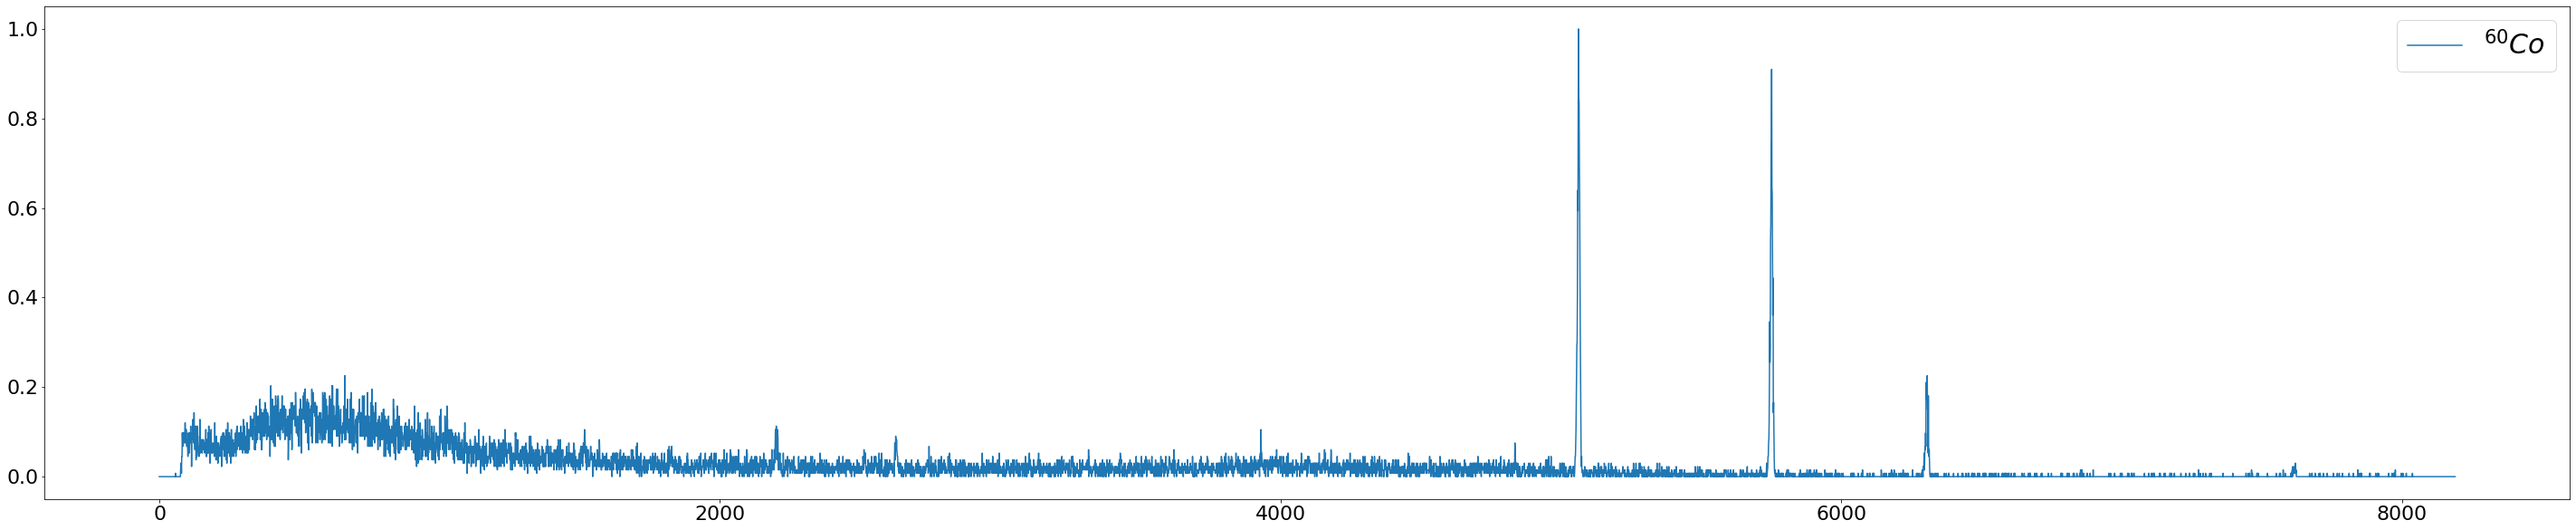

In [22]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
# plt.plot(spectrum_x/max(spectrum_x), label=r'X')
plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

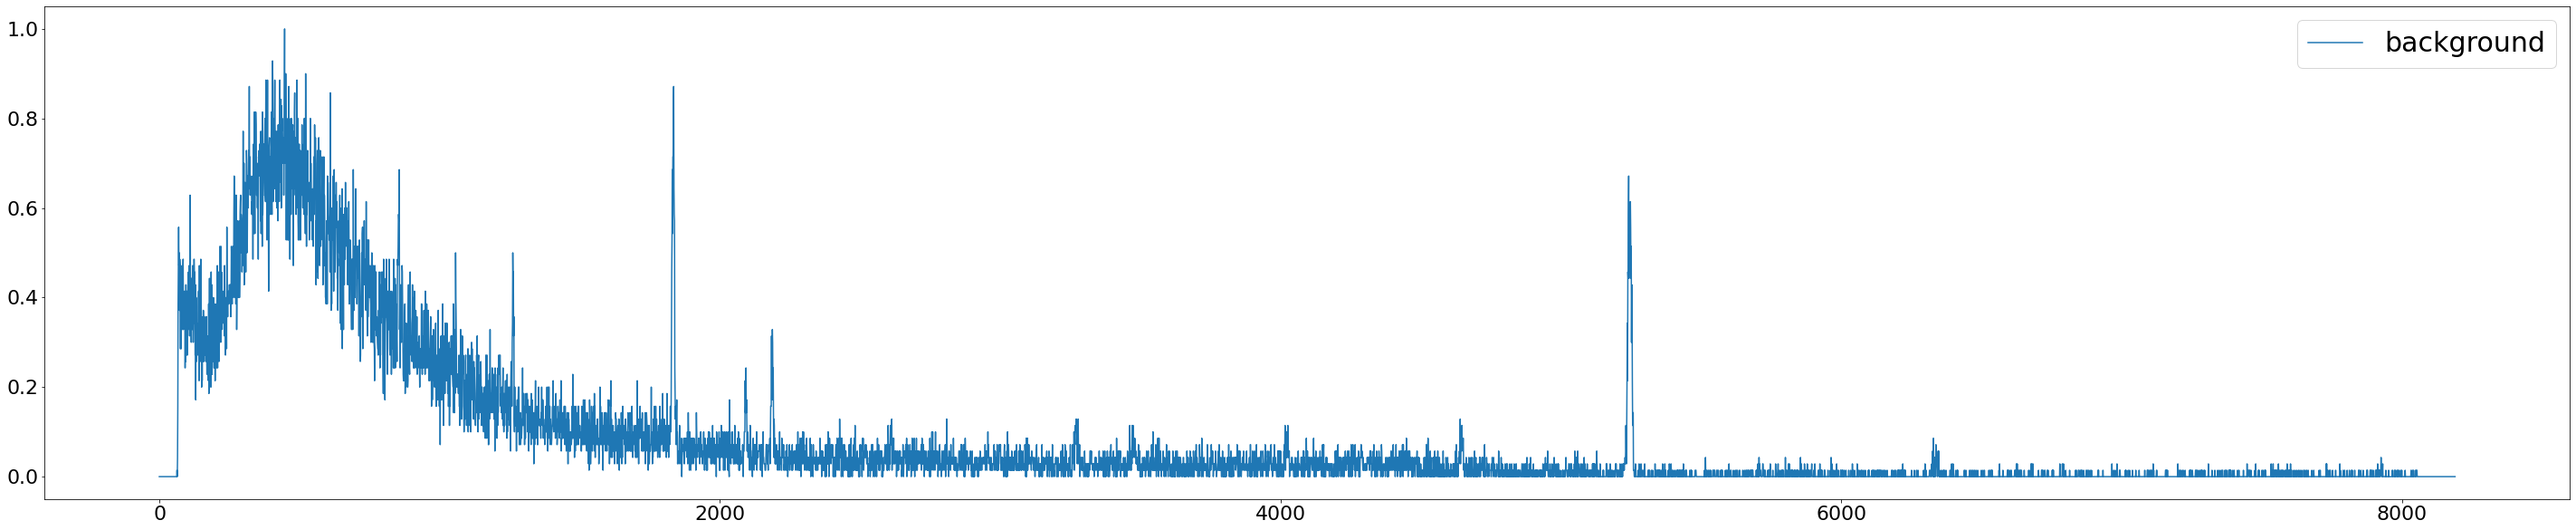

In [23]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
# plt.plot(spectrum_x/max(spectrum_x), label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

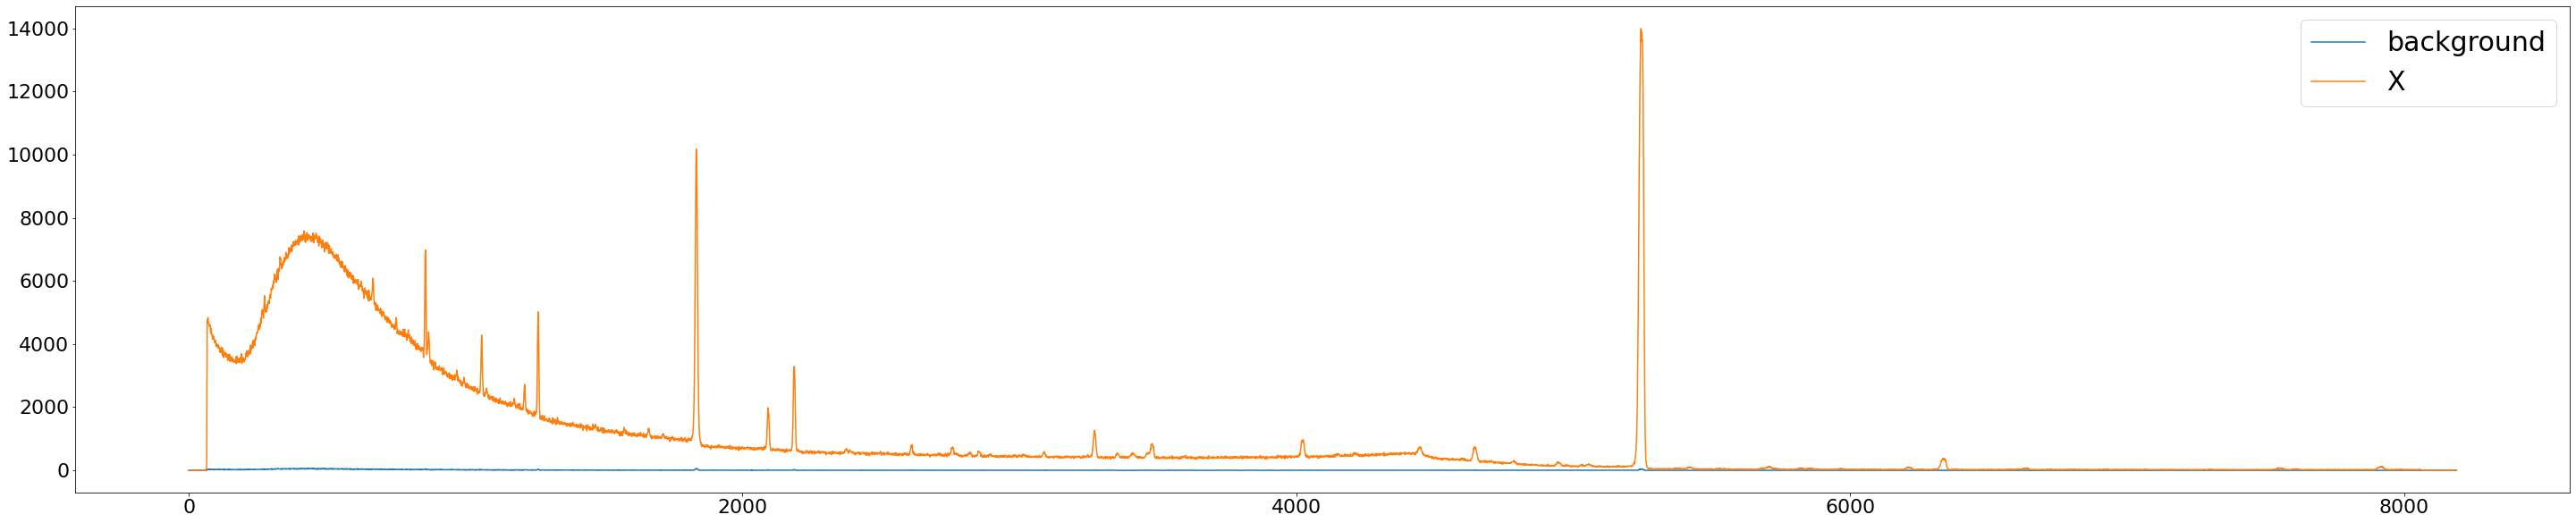

In [24]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

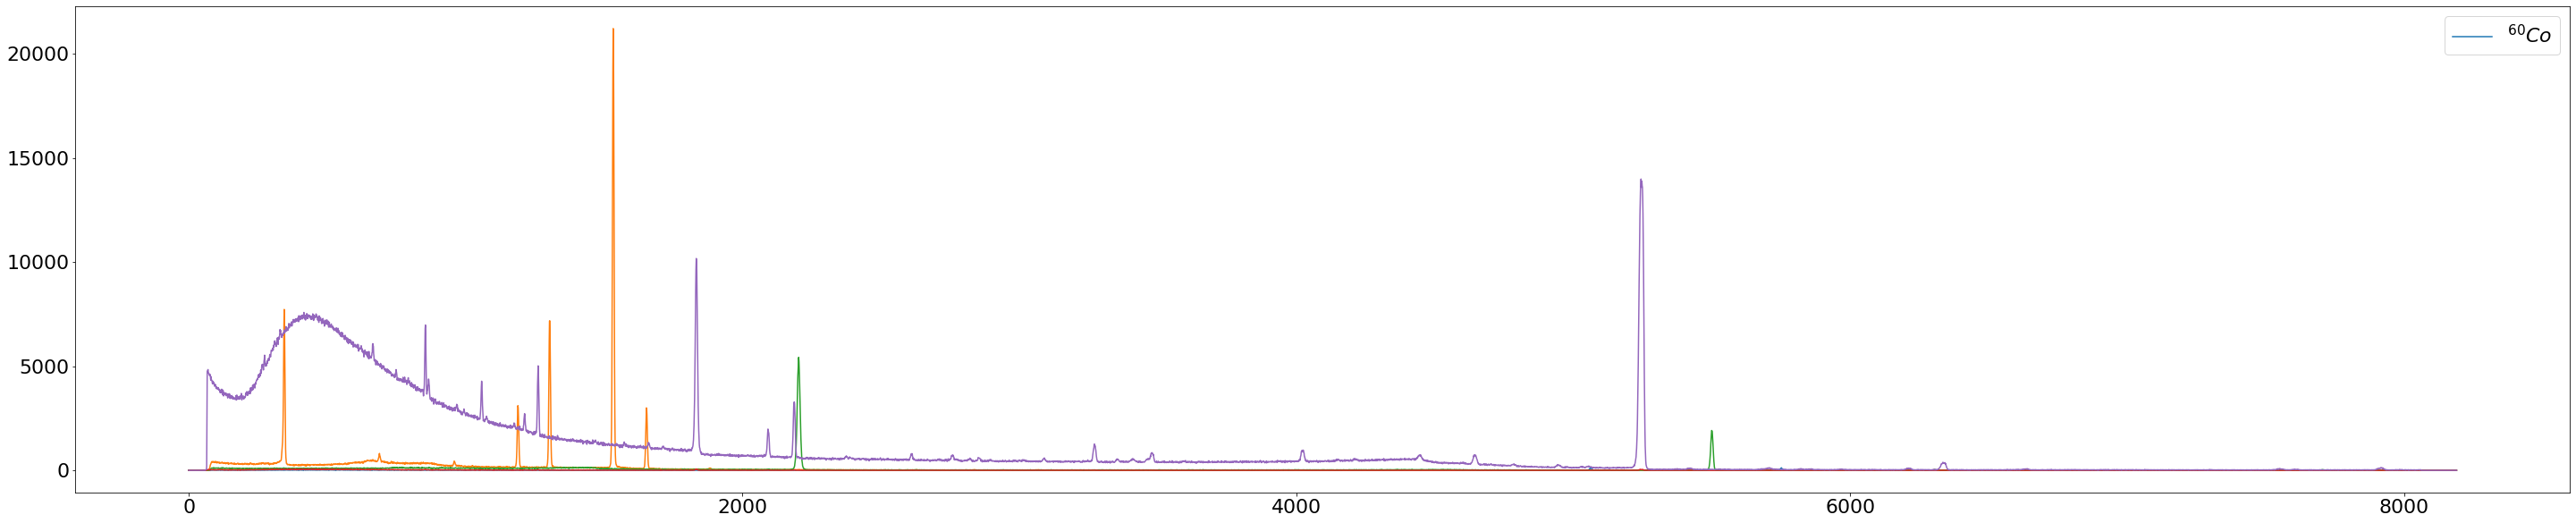

In [25]:
plt.figure(figsize=(50, 10))

plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133)
plt.plot(spectrum_na22)
plt.plot(spectrum_bkg)
plt.plot(spectrum_x)

plt.legend()

[5063 5752]
[(4948, 5048), (5079, 5179), (5635, 5735), (5765, 5865)]


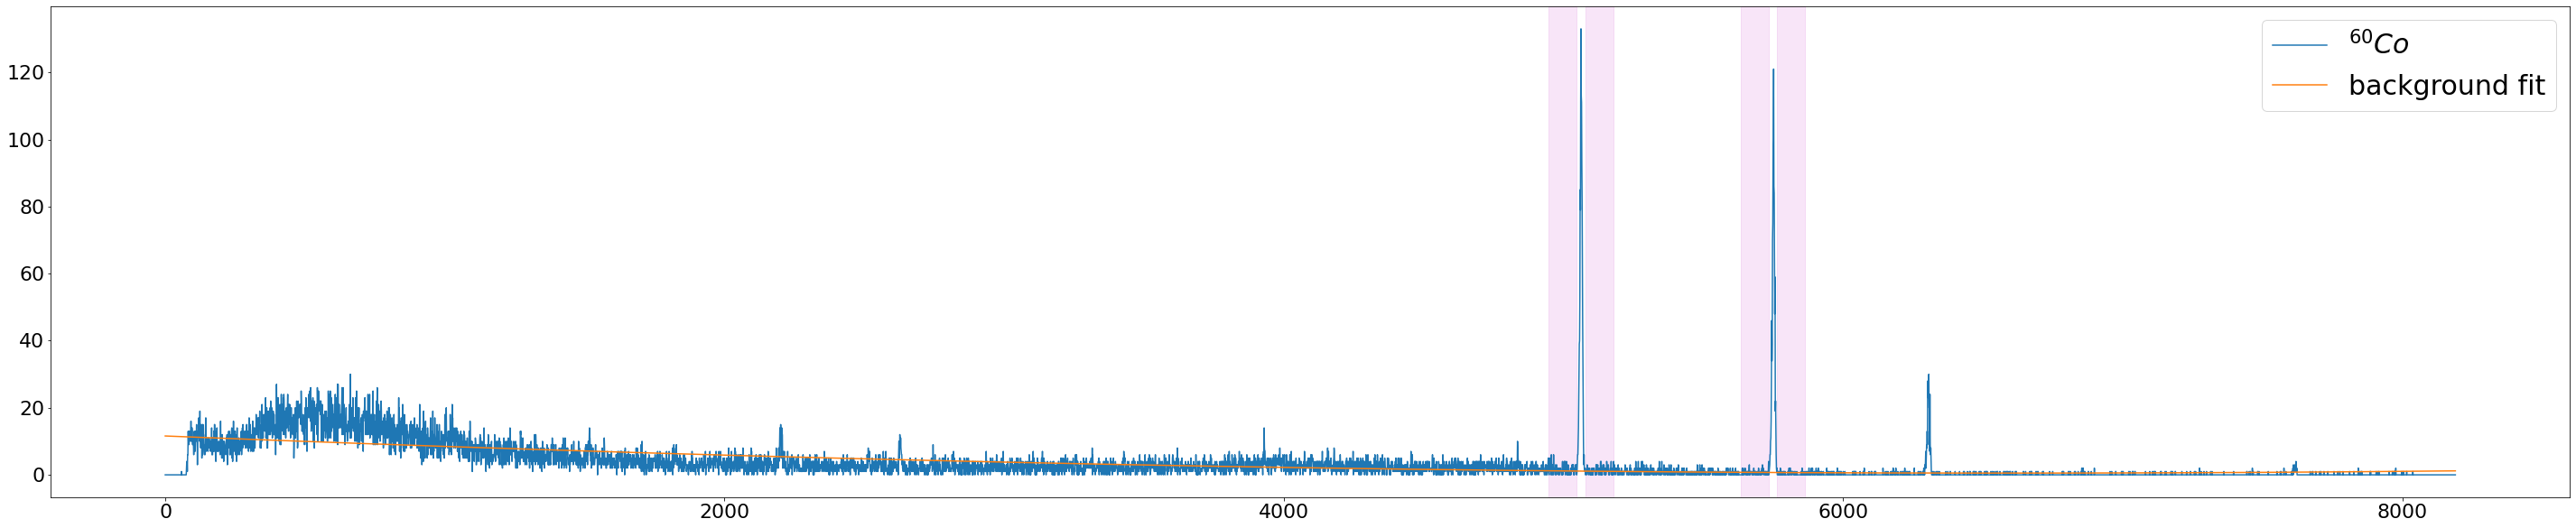

In [66]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')

from scipy.signal import find_peaks

peaks, properties = find_peaks(spectrum_co60, prominence=100, width=5)
print(peaks)
left_bases = properties["left_bases"]
right_bases = properties["right_bases"]
# plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')
background_width = 100
background_regions = []
for peak, left_base, right_base in zip(peaks, left_bases, right_bases):
    background_regions.append((left_base - background_width, left_base))
    background_regions.append((right_base, right_base + background_width))

print(background_regions)

mask_bkg1 = np.ones(len(xval), dtype=bool)

# ()^((xval>4250)*(xval<4750))^((xval>4830)*(xval<5000))
    
for start, stop in background_regions:
    plt.axvspan(start, stop,  alpha=0.1, color='m')
    mask_bkg1 = mask_bkg1^((xval>start)*(xval<stop))

coeff = np.polyfit(xval[mask_bkg1], spectrum_co60[mask_bkg1], 2)
bkgfit = np.polyval(coeff, xval)

plt.plot(xval, bkgfit, label='background fit')

plt.legend(fontsize=30)
# plt.ylim(0, 1000)
#plt.xlim(5000, 6000)

In [67]:
from scipy.optimize import curve_fit

In [72]:
def gauss(x, *p):
    A, t0, v = p
    return A*np.exp(-(x-t0)**2/(2.*v))

def comb_gauss(x, *p):
    distr = 0
    for j in range(2):
        distr += gauss(x, *[p[j*3],p[j*3+1],p[j*3+2]])
    return distr

coeff_gauss, _ = curve_fit(comb_gauss, xval, spectrum_co60-bkgfit, p0=[100, peaks[0], 10, 100, peaks[1], 10])
fit_hist = comb_gauss(xval, *coeff_gauss)


[5063 5752]
[(4948, 5048), (5079, 5179), (5635, 5735), (5765, 5865)]


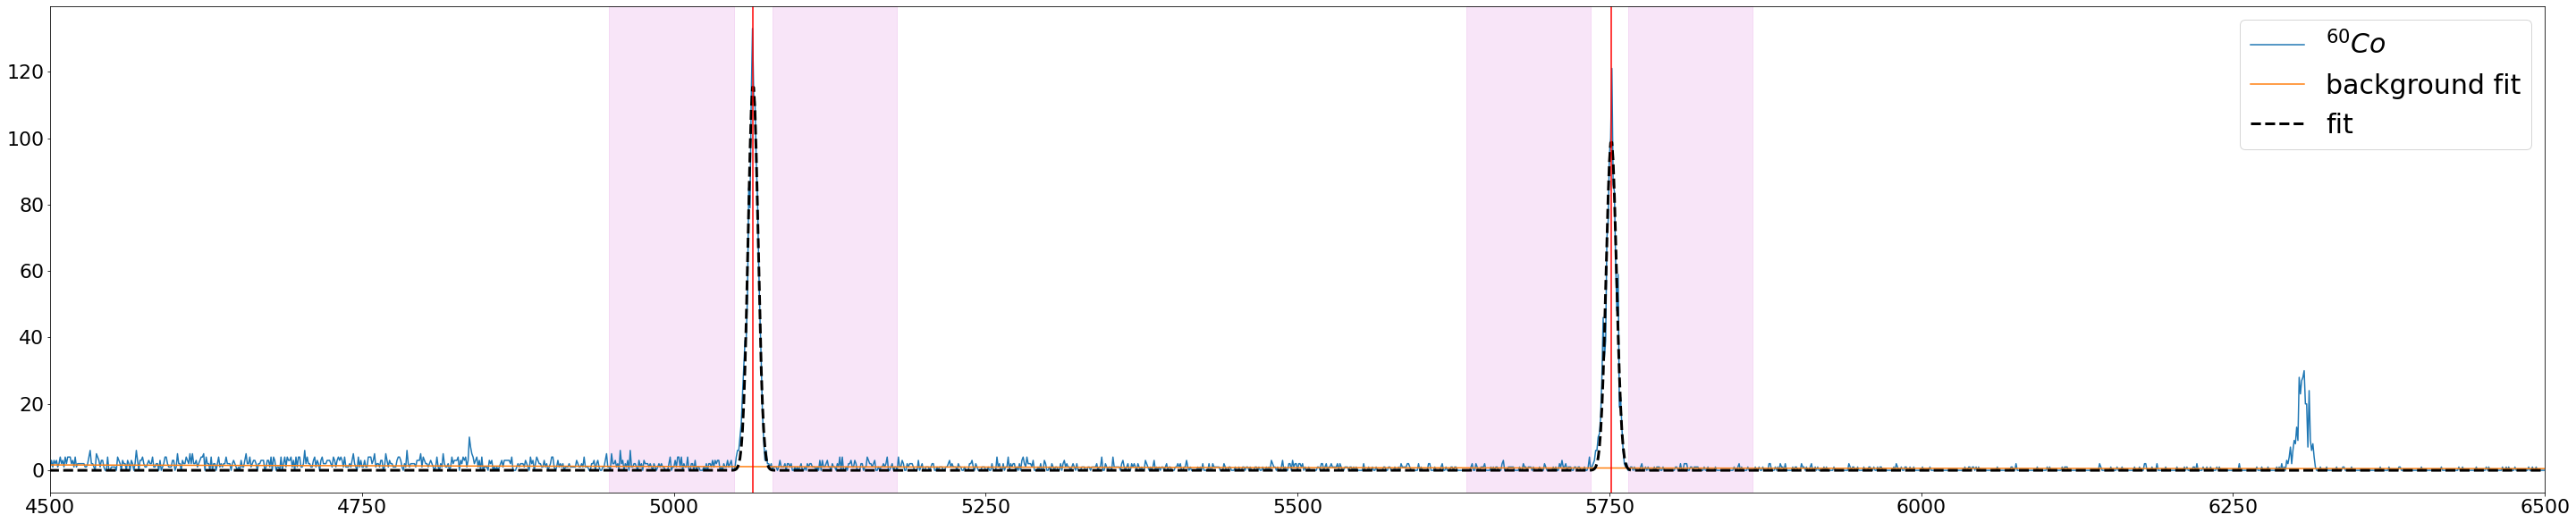

In [77]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')

from scipy.signal import find_peaks

peaks, properties = find_peaks(spectrum_co60, prominence=100, width=5)
print(peaks)
left_bases = properties["left_bases"]
right_bases = properties["right_bases"]
# plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')
background_width = 100
background_regions = []
for peak, left_base, right_base in zip(peaks, left_bases, right_bases):
    background_regions.append((left_base - background_width, left_base))
    background_regions.append((right_base, right_base + background_width))

print(background_regions)

mask_bkg1 = np.ones(len(xval), dtype=bool)

# ()^((xval>4250)*(xval<4750))^((xval>4830)*(xval<5000))
    
for start, stop in background_regions:
    plt.axvspan(start, stop,  alpha=0.1, color='m')
    mask_bkg1 = mask_bkg1^((xval>start)*(xval<stop))

coeff = np.polyfit(xval[mask_bkg1], spectrum_co60[mask_bkg1], 2)
bkgfit = np.polyval(coeff, xval)

plt.plot(xval, bkgfit, label='background fit')

plt.plot(xval, fit_hist, c='k', lw=3, ls='--', label="fit")

plt.axvline(coeff_gauss[1], c='r')
plt.axvline(coeff_gauss[4], c='r')


plt.legend(fontsize=30)
# plt.ylim(0, 1000)
plt.xlim(4500, 6500)
plt.show()

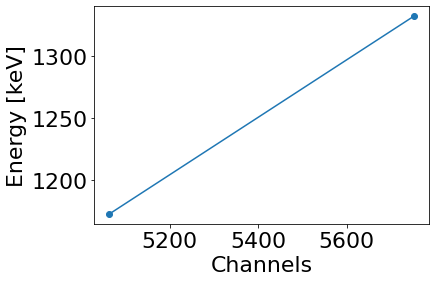

In [83]:

#what peaks do we need to match?
Co60_Peaks = [1173, 1332]  # keV
# Ba133_Peaks = [356]
# Na22_Peaks = [511, 1274]

plt.plot([coeff_gauss[1],coeff_gauss[4]], Co60_Peaks, '-o')
plt.ylabel("Energy [keV]")
plt.xlabel("Channels")
plt.show()

In [84]:
coeff_gauss

array([ 116.20861139, 5063.48836728,   15.95359059,   99.39877167,
       5751.52040212,   17.01252173])

In [85]:
cal1 = np.polyfit([coeff_gauss[1],coeff_gauss[4]], [1173, 1332], 1)

#convert our channel values to energy values for the x axis based off the results of the 
channelToEnergy = np.polyval(cal1, xval)

In [86]:
# cal1

In [87]:
# 0.277*4200+1.8287

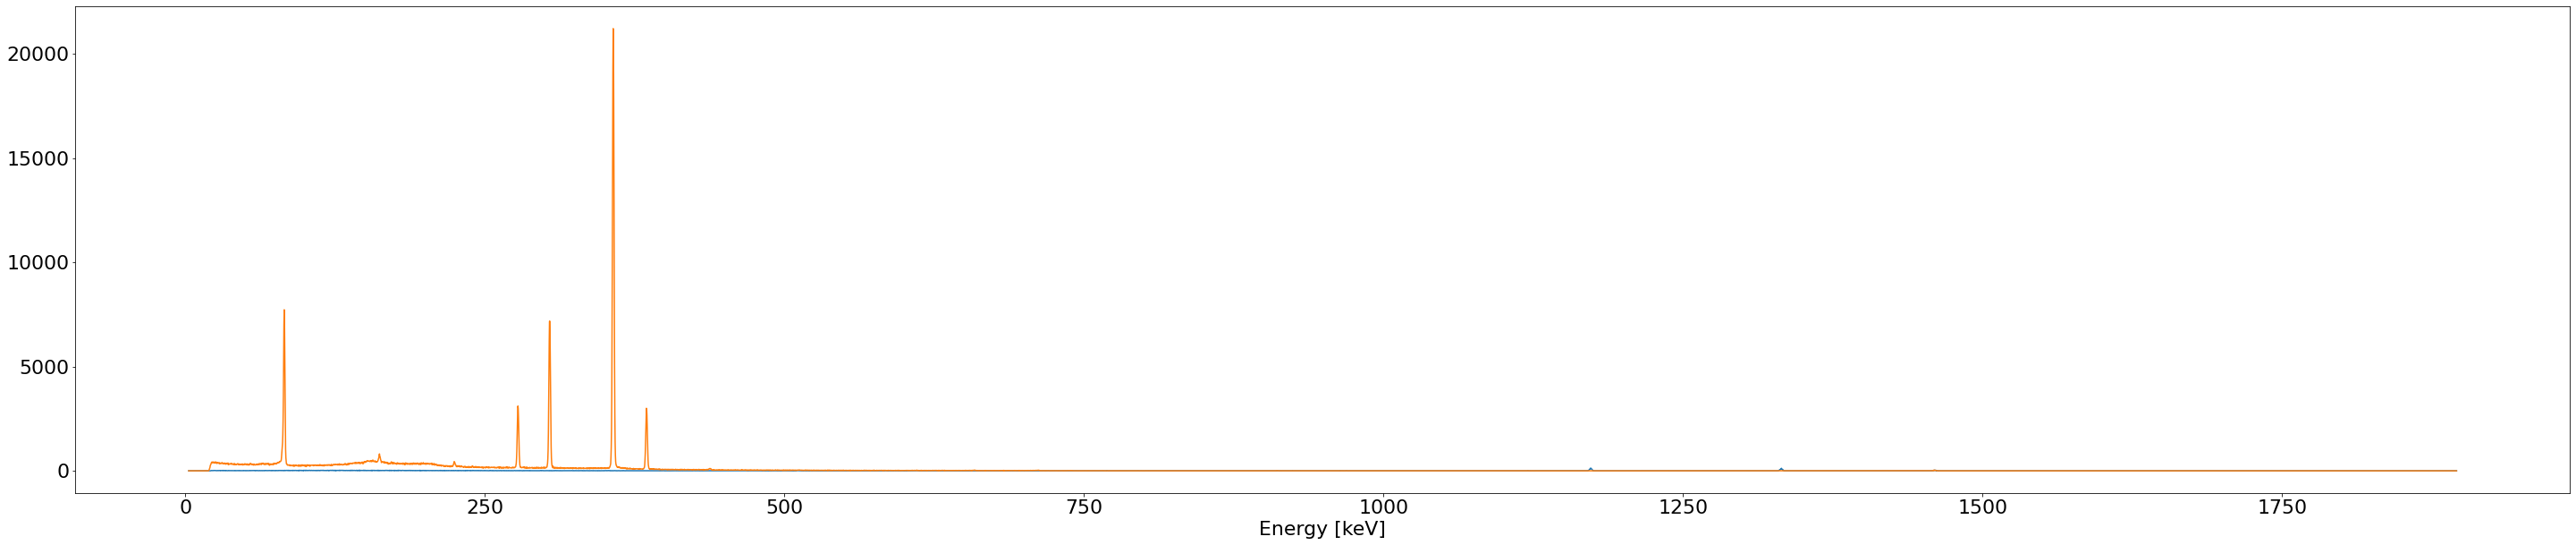

In [88]:
plt.figure(figsize=(50, 10))

# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(channelToEnergy, spectrum_co60, label=r'$^{60}Co$')
plt.plot(channelToEnergy, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')
plt.xlabel("Energy [keV]")
plt.show()

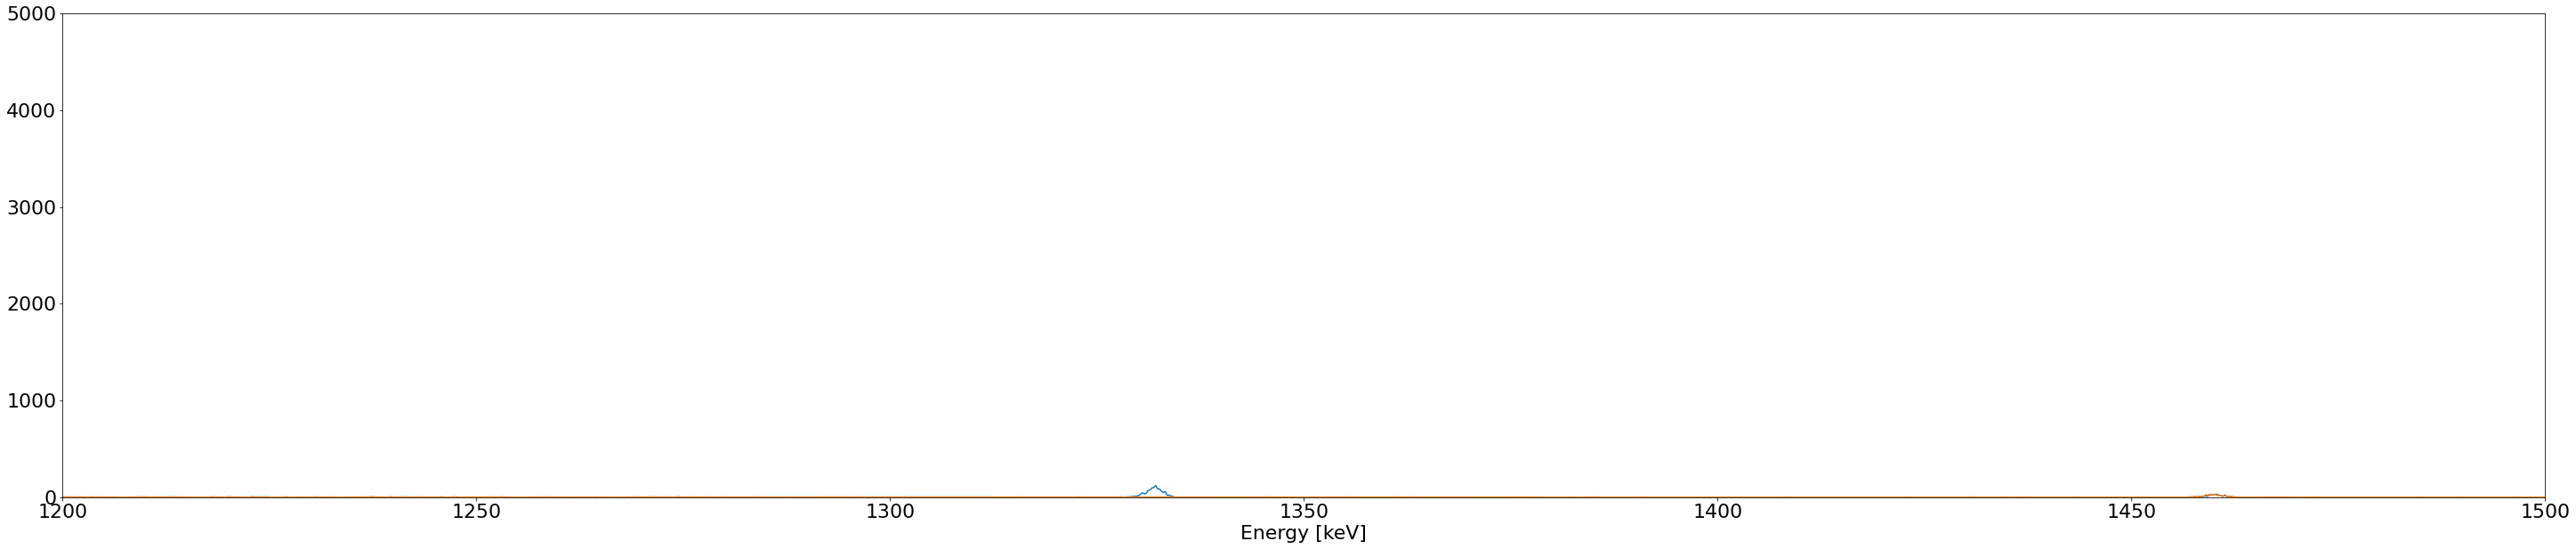

In [89]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(channelToEnergy, spectrum_co60, label=r'$^{60}Co$')
plt.plot(channelToEnergy, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')
plt.xlabel("Energy [keV]")
plt.ylim(0, 5000)
plt.xlim(1200, 1500)
plt.show()

(0.0, 500.0)

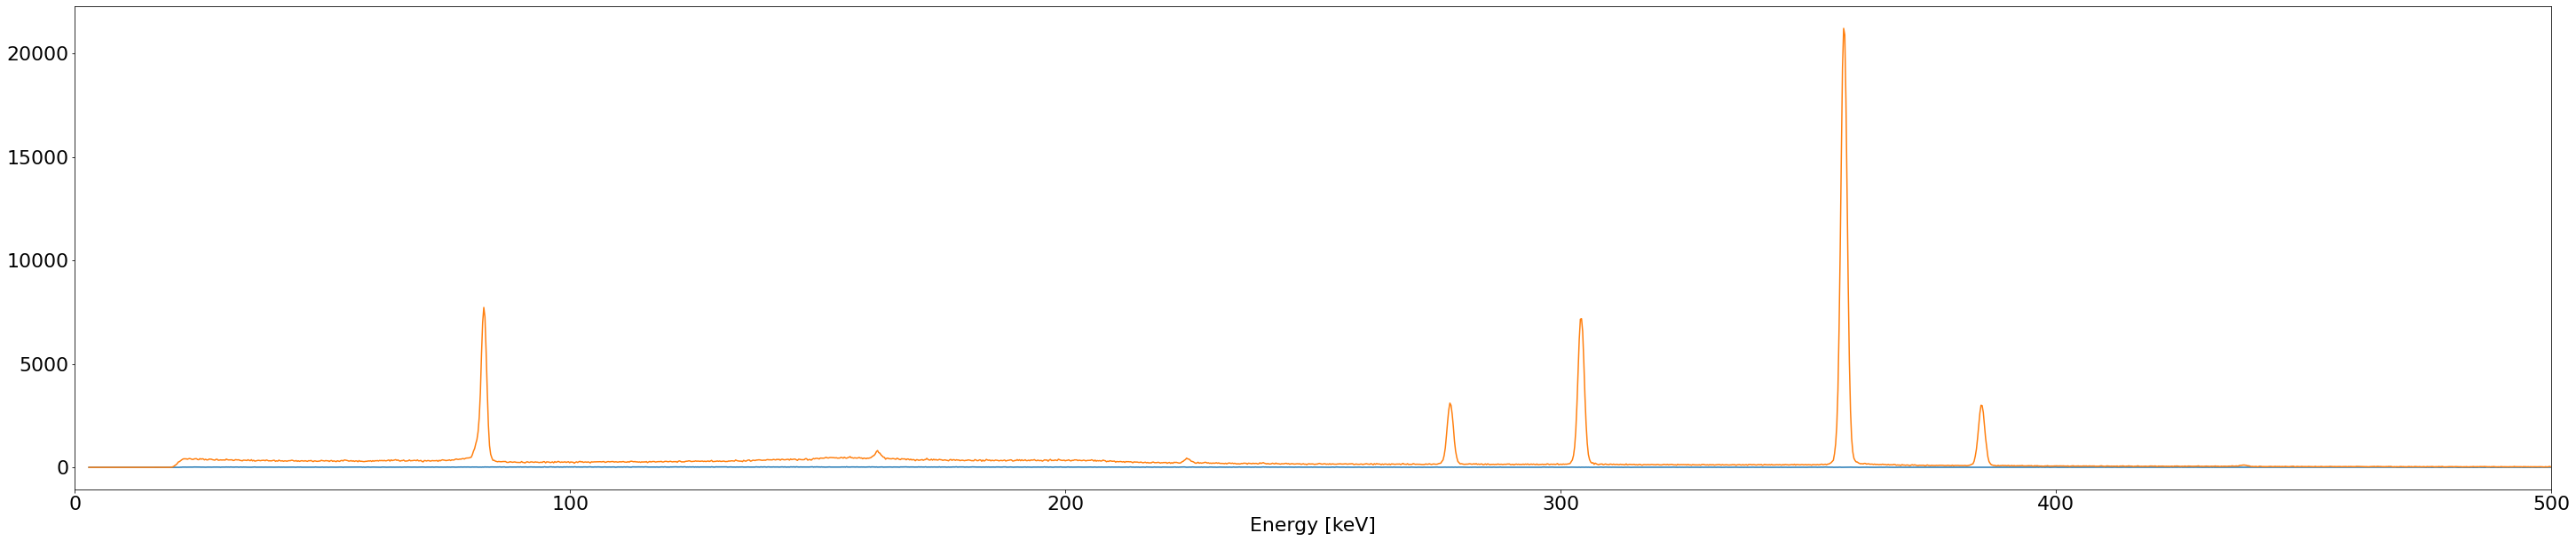

In [90]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(channelToEnergy, spectrum_co60, label=r'$^{60}Co$')
plt.plot(channelToEnergy, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.xlabel("Energy [keV]")
plt.xlim(0, 500)

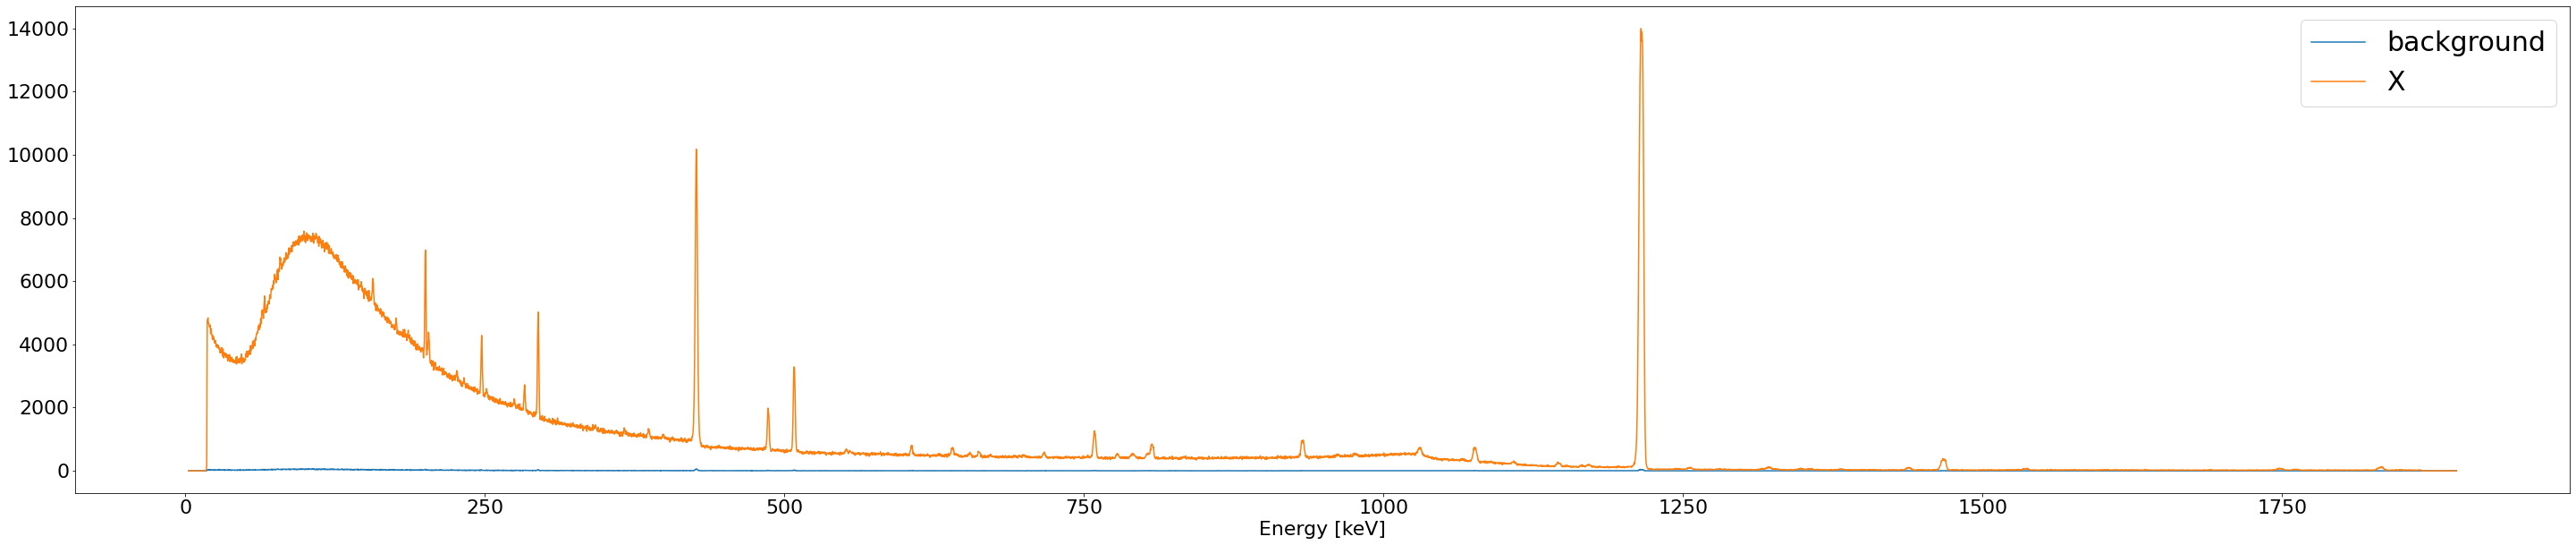

In [91]:
plt.figure(figsize=(50, 10))


plt.plot(channelToEnergy,spectrum_bkg, label=r'background')
plt.plot(channelToEnergy,spectrum_x, label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')
plt.xlabel("Energy [keV]")
plt.legend(fontsize=30)

In [92]:
# ?np.polyfit

In [98]:
### summing up peaks to get total areas of counts

coeff_gauss_E, _ = curve_fit(comb_gauss, channelToEnergy, spectrum_co60-bkgfit, p0=[100, 1173, 3, 100, 1332, 3])
fit_hist_E = comb_gauss(channelToEnergy, *coeff_gauss_E)

#splits our array up, cutting whereever there is a entry, and making sure we cut the 
#energy array the same way
fit_hist_E_split = np.array(np.split(fit_hist_E, np.where(fit_hist_E == 0)[0][1:]), dtype=object)
channelToEnergy_split = np.array(np.split(channelToEnergy, np.where(fit_hist_E == 0)[0][1:]), dtype=object)

#remove all arrays that are length 1 or less
lengths = [len(i)>1 for i in fit_hist_E_split]

#a 2D array holding the values around each peak
fit_hist_E_peaks = fit_hist_E_split[lengths]
channelToEnergyPeaks = channelToEnergy_split[lengths]

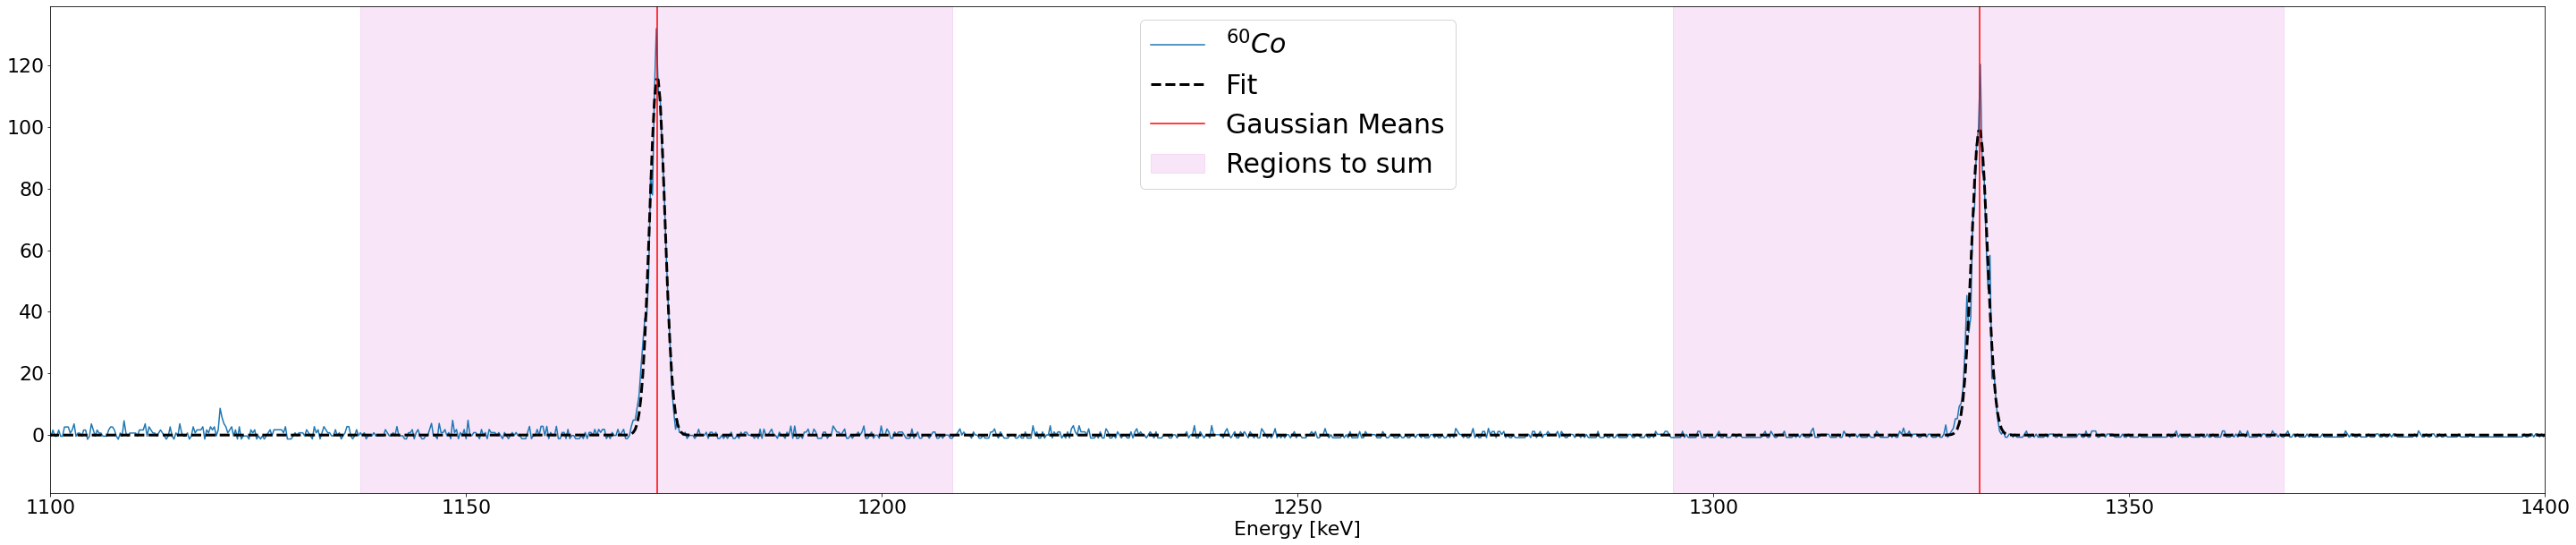

In [101]:
plt.figure(figsize=(50, 10))

plt.plot(channelToEnergy, spectrum_co60-bkgfit, label=r'$^{60}Co$')

#get the min and max energy values that we will sum around for plotting
minMaxEnergyValues = [[np.min(x), np.max(x)] for x in channelToEnergyPeaks]

#empty region just to hold the label
plt.axvspan(0, 0, alpha=0.1, color='m', label="Regions to sum")

for vals in minMaxEnergyValues:
    plt.axvspan(vals[0], vals[1], alpha=0.1, color='m')

plt.plot(channelToEnergy, fit_hist_E, c='k', lw=3, ls='--', label="Fit")

plt.axvline(coeff_gauss_E[1], c='r', label="Gaussian Means")
plt.axvline(coeff_gauss_E[4], c='r')

plt.legend(fontsize=30)
plt.xlim(1100, 1400)

plt.xlabel("Energy [keV]")
plt.show()

In [102]:
#takes in sprectrum that is alreay cut for only one peak
def SumPeaks(x, spectrum):
    
    #the width of one bin
    binwidth = x[2] - x[1]
    
    #sum up all our bins in a region
    totalArea = np.sum(spectrum)*binwidth
    
    return totalArea

#loop through all the peaks and calculate the area under the curve
AreaPeaks = []

for i, peakData in enumerate(fit_hist_E_peaks):
    
    AreaPeaks.append(SumPeaks(channelToEnergyPeaks[i], peakData))
    
print("The total area under each peak is:", AreaPeaks)

The total area under each peak is: [268.8712784520002, 237.49035653168724]


In [103]:
'''
Returns current activity in Bq
inputs:
    A0 [Bq]
    time [days]
    half_life [days]
'''

def currentActivity(A0, time, half_life):
    return A0*np.exp(-(time*np.log(2))/half_life)

Na22_currentAct = currentActivity(37e3, 762, 2.6018*365)
print(Na22_currentAct)

Co66_currentAct = currentActivity(3.7e5, 16390, 1925.28)
print(Co66_currentAct)

Ba133_currentAct = currentActivity(3.81e5, 6925, 10.551*365)
print(Ba133_currentAct)

21215.67088952769
1012.789257614295
109551.59360259165
